In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
# 랜덤 시드를 고정한다. 딥러닝 모델의 재현성을 높이기 위해 가능한 모든 랜덤 시드를 미리 고정해두는 것이 좋다.
# 랜덤 시드 고정

SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("시드 고정:",SEED)

시드 고정: 12


# 데이터 전처리

In [3]:
# sklearn 데이터 셋으로부터 보스턴 주택 데이터셋 로딩
from sklearn import datasets
housing=datasets.load_boston()


# housing 데이터 셋은 딕셔너리 형태이므로, key값 확인
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
x_data=housing.data
y_data=housing.target
print(x_data.shape,y_data.shape)

(506, 13) (506,)


* 입력 데이터의 서로 다른 피처 값의 범위를 비슷한 크기로 맞춰주면 딥러닝모델의 성능을 확보하는데 유리하다.
* 이를 피처 스케일링이라고 한다.

In [5]:
# 피처 스케일링
# MinMaxScaler를 사용하여 입력 데이터의 모든 피처 값을 0~1 범위로 정규화 처리한다.

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x_data_scaled=scaler.fit_transform(x_data)

x_data_scaled[0] # 첫번째 인덱스 행의 피처들이 feature scaled 됐는지 확인

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [14]:
# 학습 - train,test(검증) 데이터셋 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,
                                              shuffle=True,
                                              random_state=SEED)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [15]:
# 예제에서 scaled된 데이터 셋을 이용하지 않길래 한번 딥러닝모델의 성능 차이가 어떻게 되는지 보자

x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled=train_test_split(x_data_scaled,y_data,test_size=0.2,
                                                                          shuffle=True,
                                                                          random_state=SEED)
print(x_train_scaled.shape,y_train_scaled.shape)
print(x_test_scaled.shape,y_test_scaled.shape)

(404, 13) (404,)
(102, 13) (102,)


In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_model(num_input=1):
    model=Sequential()
    model.add(Dense(128,activation='relu',input_dim=num_input))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    model.compile(optimizer='adam',loss='mse',metrics=['mae'])
    
    return model

model=build_model(num_input=13)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


# 미니 배치 학습

In [17]:
# 모델 훈련
model.fit(x_train,y_train,epochs=100,batch_size=32,verbose=2)

Epoch 1/100
13/13 - 1s - loss: 87.6453 - mae: 6.9585
Epoch 2/100
13/13 - 0s - loss: 66.3272 - mae: 5.8104
Epoch 3/100
13/13 - 0s - loss: 65.1841 - mae: 5.7634
Epoch 4/100
13/13 - 0s - loss: 59.6213 - mae: 5.6163
Epoch 5/100
13/13 - 0s - loss: 55.4058 - mae: 5.3637
Epoch 6/100
13/13 - 0s - loss: 65.1745 - mae: 5.7097
Epoch 7/100
13/13 - 0s - loss: 55.0850 - mae: 5.6530
Epoch 8/100
13/13 - 0s - loss: 55.0642 - mae: 5.2550
Epoch 9/100
13/13 - 0s - loss: 51.0933 - mae: 5.1127
Epoch 10/100
13/13 - 0s - loss: 45.4516 - mae: 4.7980
Epoch 11/100
13/13 - 0s - loss: 48.3348 - mae: 5.0286
Epoch 12/100
13/13 - 0s - loss: 45.4268 - mae: 4.7722
Epoch 13/100
13/13 - 0s - loss: 58.0283 - mae: 5.6321
Epoch 14/100
13/13 - 0s - loss: 42.6126 - mae: 4.5920
Epoch 15/100
13/13 - 0s - loss: 44.7083 - mae: 4.7147
Epoch 16/100
13/13 - 0s - loss: 38.9313 - mae: 4.3531
Epoch 17/100
13/13 - 0s - loss: 41.0174 - mae: 4.7285
Epoch 18/100
13/13 - 0s - loss: 39.2630 - mae: 4.5150
Epoch 19/100
13/13 - 0s - loss: 35.95

In [18]:
# 모델 훈련 (scaled)
model.fit(x_train_scaled,y_train_scaled,epochs=100,batch_size=32,verbose=2)

Epoch 1/100
13/13 - 0s - loss: 507.5242 - mae: 20.4944
Epoch 2/100
13/13 - 0s - loss: 190.8426 - mae: 11.1682
Epoch 3/100
13/13 - 0s - loss: 86.1614 - mae: 6.8732
Epoch 4/100
13/13 - 0s - loss: 60.0664 - mae: 5.7620
Epoch 5/100
13/13 - 0s - loss: 48.6092 - mae: 5.0184
Epoch 6/100
13/13 - 0s - loss: 42.0594 - mae: 4.5991
Epoch 7/100
13/13 - 0s - loss: 39.7618 - mae: 4.4604
Epoch 8/100
13/13 - 0s - loss: 35.6116 - mae: 4.2445
Epoch 9/100
13/13 - 0s - loss: 32.6601 - mae: 3.9344
Epoch 10/100
13/13 - 0s - loss: 30.2513 - mae: 3.8960
Epoch 11/100
13/13 - 0s - loss: 27.8321 - mae: 3.5667
Epoch 12/100
13/13 - 0s - loss: 26.6893 - mae: 3.6038
Epoch 13/100
13/13 - 0s - loss: 24.1330 - mae: 3.3657
Epoch 14/100
13/13 - 0s - loss: 23.3509 - mae: 3.2999
Epoch 15/100
13/13 - 0s - loss: 22.1673 - mae: 3.2506
Epoch 16/100
13/13 - 0s - loss: 21.1580 - mae: 3.0696
Epoch 17/100
13/13 - 0s - loss: 20.5389 - mae: 3.1108
Epoch 18/100
13/13 - 0s - loss: 20.1469 - mae: 2.9890
Epoch 19/100
13/13 - 0s - loss: 1

* 피처 스케일링 진행한 모델의 성능이 더 좋다.

In [20]:
# 모델 평가 2
model.evaluate(x_test_scaled,y_test_scaled)

4/4 [==============================] - 0s 998us/step - loss: 12.2936 - mae: 2.5508


[12.293611526489258, 2.550835371017456]

# 교차 검증

In [21]:
model=build_model(num_input=13)
history=model.fit(x_train_scaled,y_train_scaled,batch_size=32,epochs=200,
                 validation_split=0.25,verbose=2)

Epoch 1/200
10/10 - 1s - loss: 566.7573 - mae: 21.9385 - val_loss: 515.1504 - val_mae: 20.7047
Epoch 2/200
10/10 - 0s - loss: 503.1967 - mae: 20.4027 - val_loss: 426.7216 - val_mae: 18.3588
Epoch 3/200
10/10 - 0s - loss: 380.5531 - mae: 16.9985 - val_loss: 269.0836 - val_mae: 13.3364
Epoch 4/200
10/10 - 0s - loss: 203.0931 - mae: 11.1510 - val_loss: 125.0759 - val_mae: 8.5931
Epoch 5/200
10/10 - 0s - loss: 129.1895 - mae: 8.9223 - val_loss: 121.8186 - val_mae: 8.9673
Epoch 6/200
10/10 - 0s - loss: 105.4088 - mae: 7.8732 - val_loss: 87.9445 - val_mae: 7.0101
Epoch 7/200
10/10 - 0s - loss: 89.8491 - mae: 6.8246 - val_loss: 74.3090 - val_mae: 6.2348
Epoch 8/200
10/10 - 0s - loss: 76.7941 - mae: 6.4276 - val_loss: 63.4918 - val_mae: 6.2655
Epoch 9/200
10/10 - 0s - loss: 67.2318 - mae: 5.9897 - val_loss: 55.6388 - val_mae: 5.4379
Epoch 10/200
10/10 - 0s - loss: 61.5730 - mae: 5.5181 - val_loss: 50.3621 - val_mae: 5.0067
Epoch 11/200
10/10 - 0s - loss: 56.6806 - mae: 5.3517 - val_loss: 46.70

Epoch 91/200
10/10 - 0s - loss: 7.3594 - mae: 1.9530 - val_loss: 11.1346 - val_mae: 2.4082
Epoch 92/200
10/10 - 0s - loss: 7.0897 - mae: 1.9380 - val_loss: 12.0333 - val_mae: 2.3992
Epoch 93/200
10/10 - 0s - loss: 7.4638 - mae: 1.9687 - val_loss: 11.2201 - val_mae: 2.3299
Epoch 94/200
10/10 - 0s - loss: 7.1243 - mae: 1.9335 - val_loss: 10.7421 - val_mae: 2.3475
Epoch 95/200
10/10 - 0s - loss: 7.0200 - mae: 1.9168 - val_loss: 11.0896 - val_mae: 2.4099
Epoch 96/200
10/10 - 0s - loss: 7.0451 - mae: 1.8829 - val_loss: 10.7635 - val_mae: 2.3383
Epoch 97/200
10/10 - 0s - loss: 7.0880 - mae: 1.9631 - val_loss: 12.8930 - val_mae: 2.4459
Epoch 98/200
10/10 - 0s - loss: 7.3227 - mae: 1.9223 - val_loss: 10.8355 - val_mae: 2.3013
Epoch 99/200
10/10 - 0s - loss: 6.7081 - mae: 1.8679 - val_loss: 11.0740 - val_mae: 2.3023
Epoch 100/200
10/10 - 0s - loss: 6.5964 - mae: 1.9002 - val_loss: 10.6638 - val_mae: 2.2885
Epoch 101/200
10/10 - 0s - loss: 6.9236 - mae: 1.9233 - val_loss: 10.7326 - val_mae: 2.37

Epoch 181/200
10/10 - 0s - loss: 3.4170 - mae: 1.4214 - val_loss: 10.2223 - val_mae: 2.3094
Epoch 182/200
10/10 - 0s - loss: 3.6165 - mae: 1.4277 - val_loss: 9.9319 - val_mae: 2.2153
Epoch 183/200
10/10 - 0s - loss: 3.3743 - mae: 1.4001 - val_loss: 10.1173 - val_mae: 2.2217
Epoch 184/200
10/10 - 0s - loss: 3.2690 - mae: 1.3649 - val_loss: 10.0351 - val_mae: 2.1487
Epoch 185/200
10/10 - 0s - loss: 3.2221 - mae: 1.3682 - val_loss: 10.0346 - val_mae: 2.2018
Epoch 186/200
10/10 - 0s - loss: 3.1833 - mae: 1.3520 - val_loss: 9.8348 - val_mae: 2.2364
Epoch 187/200
10/10 - 0s - loss: 3.7552 - mae: 1.4604 - val_loss: 9.8666 - val_mae: 2.1939
Epoch 188/200
10/10 - 0s - loss: 3.5241 - mae: 1.4329 - val_loss: 9.9270 - val_mae: 2.2019
Epoch 189/200
10/10 - 0s - loss: 3.5923 - mae: 1.4370 - val_loss: 10.1154 - val_mae: 2.1669
Epoch 190/200
10/10 - 0s - loss: 3.4351 - mae: 1.4131 - val_loss: 10.8532 - val_mae: 2.2165
Epoch 191/200
10/10 - 0s - loss: 3.4922 - mae: 1.4056 - val_loss: 9.8950 - val_mae: 

* 200번째 에포크 학습이 끝났을 때, 훈련 손실이 검증 손실보다 작은 값이므로, 과대 적합 상태로 판단된다.

In [23]:
import matplotlib.pyplot as plt

def plot_loss_curve(total_epoch=10,start=1):
    plt.figure(figsize=(5,5))
    plt.plot(range(start,total_epoch+1),history.history['loss'][start-1:total_epoch],
            label='Train')
    plt.plot(range(start,total_epoch+1),history.history['val_loss'][start-1:total_epoch],
            label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()
    


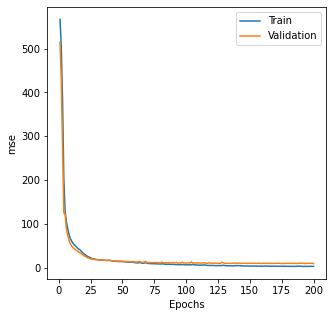

In [24]:
plot_loss_curve(total_epoch=200,start=1)

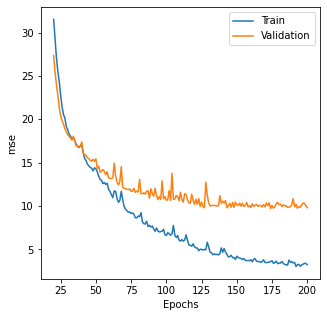

In [25]:
plot_loss_curve(total_epoch=200,start=20)

* 40 에포크 이후 과대적합이 커지는 것을 볼 수 있다.